In [1]:
"""
This program will read all .mat files in the folder "OpenData, and search for the columns:

    - SOC
    - Voltage
    - Current
    - Temperature

When a columns has been found, it will be added to the respective list.
If a column is not found any where in the file, the file will be skipped, and a message will be printed to the console.
If all columns are successfully found, they will be added to a csv file
"""

import pandas as pd
import os
import csv
import scipy.io as sio
import numpy as np

In [2]:
# In the folder OpenData within the current directory find every .mat file in the folders and subfolders of OpenData
# print the file name of all the .mat files found as well as the total number of files found

import os
import glob

# Get the current working directory
cwd = os.getcwd()

# Get the path to the OpenData folder
path = os.path.join(cwd, 'OpenData')

# Get the path to all the .mat files in the OpenData folder
mat_files = glob.glob(path + '/**/*.mat', recursive=True)

# Print the file name of all the .mat files found
for file in mat_files:
    print(file)

# Print the total number of .mat files found
print('Total number of .mat files found: ' + str(len(mat_files)))

/home/witvoetk/Range-Estimation-MARC/ITEC_Comp/OpenData/m1000/10C/Characterization Tests/5_CC_CV_charge_09-10-21_19.36 Tesla_Cher_10C_Channel_4_Wb_1.mat
/home/witvoetk/Range-Estimation-MARC/ITEC_Comp/OpenData/m1000/10C/Characterization Tests/1_Other_09-09-21_10.31 Tesla_Cher_10C_Channel_4_Wb_1.mat
/home/witvoetk/Range-Estimation-MARC/ITEC_Comp/OpenData/m1000/10C/Characterization Tests/2_40C_Discharge_09-09-21_14.43 Tesla_Cher_10C_Channel_4_Wb_1.mat
/home/witvoetk/Range-Estimation-MARC/ITEC_Comp/OpenData/m1000/10C/Characterization Tests/11_1C_Discharge_09-14-21_11.51 Tesla_Cher_10C_Channel_4_Wb_1.mat
/home/witvoetk/Range-Estimation-MARC/ITEC_Comp/OpenData/m1000/10C/Characterization Tests/6_HPPC_09-11-21_01.28 Tesla_Cher_10C_Channel_4_Wb_1.mat
/home/witvoetk/Range-Estimation-MARC/ITEC_Comp/OpenData/m1000/10C/Characterization Tests/9_0.5C_Discharge_09-14-21_04.11 Tesla_Cher_10C_Channel_4_Wb_1.mat
/home/witvoetk/Range-Estimation-MARC/ITEC_Comp/OpenData/m1000/10C/Characterization Tests/7_CC

In [3]:
filename = "train_data.csv"

last_soc = 0

# Open the csv file and write the column names
with open(filename, 'w', newline='') as csvfile:
    writer = csv.writer(csvfile, delimiter=',')
    writer.writerow(['SOC', 'V', 'I', 'P','V_avg_five','V_avg_one','I_avg'])

    soc = []
    v = []
    i = []
    v_avg_five = []
    v_avg_one = []
    i_avg = []
    p = []

    # Loop through all the mat files
    for file in mat_files:

        # Load the .mat file
        mat = sio.loadmat(file)
        # Get the ['meas']['Voltage'] data
        v = mat['meas']['Voltage'][0][0]
        # Get the ['meas']['Current'] data
        i = mat['meas']['Current'][0][0]
        # Get the ['meas']['SOC'] data
        soc = mat['meas']['SOC'][0][0]

        # ensure all data is not empty
        if len(soc) == 0 or len(v) == 0 or len(i) == 0:
            print("Empty data in file: " + file)
        #else if the first soc value is not within 0.1 of the last soc value in the csv file
        elif abs(soc[0][0] - last_soc) > 0.1:
            print("** Data not continuous in file: " + file)
            continue
        # else if the soc value is within 0.1 of the last soc value 
        elif abs(soc[0][0] - soc[-1][0]) < 0.1:
            print("** Data continuous in file: " + file)
            continue
        else:
            # print the current file iteration and the name
            print("Processing file: " + file)

            #iterate through the lists and write the data to the csv file
            for x in range(len(soc)):

                # v_avg_five is the average voltage over the last 500 data points including the current data point
                v_avg_five.append(sum(v[max(0, x-499):x+1])/min(500, x+1))

                # v_avg_one is the average voltage over the last 100 data points including the current data point
                v_avg_one.append(sum(v[max(0, x-99):x+1])/min(100, x+1))

                # i_avg is the average current over the last 500 data points including the current data point
                i_avg.append(sum(i[max(0, x-499):x+1])/min(500, x+1))

                # p is the power
                p.append(v[x]*i[x])

                last_soc = soc[x][0]

                # Write the data to the csv file
                writer.writerow([soc[x][0], v[x][0], i[x][0], p[x][0], v_avg_five[x][0], v_avg_one[x][0], i_avg[x][0]])


Processing file: /home/witvoetk/Range-Estimation-MARC/ITEC_Comp/OpenData/m1000/10C/Characterization Tests/5_CC_CV_charge_09-10-21_19.36 Tesla_Cher_10C_Channel_4_Wb_1.mat
** Data not continuous in file: /home/witvoetk/Range-Estimation-MARC/ITEC_Comp/OpenData/m1000/10C/Characterization Tests/1_Other_09-09-21_10.31 Tesla_Cher_10C_Channel_4_Wb_1.mat
Processing file: /home/witvoetk/Range-Estimation-MARC/ITEC_Comp/OpenData/m1000/10C/Characterization Tests/2_40C_Discharge_09-09-21_14.43 Tesla_Cher_10C_Channel_4_Wb_1.mat
** Data not continuous in file: /home/witvoetk/Range-Estimation-MARC/ITEC_Comp/OpenData/m1000/10C/Characterization Tests/11_1C_Discharge_09-14-21_11.51 Tesla_Cher_10C_Channel_4_Wb_1.mat
** Data not continuous in file: /home/witvoetk/Range-Estimation-MARC/ITEC_Comp/OpenData/m1000/10C/Characterization Tests/6_HPPC_09-11-21_01.28 Tesla_Cher_10C_Channel_4_Wb_1.mat
** Data not continuous in file: /home/witvoetk/Range-Estimation-MARC/ITEC_Comp/OpenData/m1000/10C/Characterization Tes

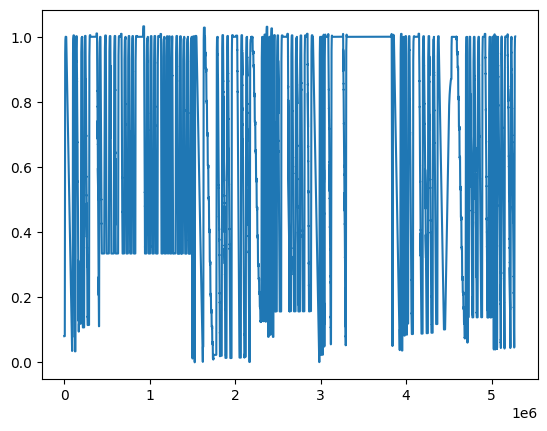

In [4]:
#load the csv file into a dataframe and print the first 5 rows
df = pd.read_csv(filename)

import matplotlib.pyplot as plt
#plot the SOC of the train data
plt.plot(df['SOC'])
plt.show()

In [5]:
#print the length of the train data
print(len(df))

5275740


In [9]:
#extract "ITEC_Comp/dataverse_files/4-Blind Model Submission Tool Examples.zip" to the current working directory

import zipfile
with zipfile.ZipFile("dataverse_files/4-Blind Model Submission Tool Examples.zip","r") as zip_ref:
    zip_ref.extractall(cwd)

In [12]:
#process the .mat file "ITEC_Comp/4-Blind Model Submission Tool Examples/Example 3 - SOC Estimator Function Tester/Battery_Data.mat" the same way as the train data
mat = sio.loadmat("4-Blind Model Submission Tool Examples/Example 3 - SOC Estimator Function Tester/Battery_Data.mat")

filename = "test_data.csv"


# Open the csv file and write the column names
with open(filename, 'w', newline='') as csvfile:
    writer = csv.writer(csvfile, delimiter=',')
    writer.writerow(['SOC', 'V', 'I', 'P','V_avg_five','V_avg_one','I_avg'])

    soc = []
    v = []
    i = []
    v_avg_five = []
    v_avg_one = []
    i_avg = []
    p = []

    # Get the ['meas']['Voltage'] data
    v = mat['meas']['Voltage'][0][0]
    # Get the ['meas']['Current'] data
    i = mat['meas']['Current'][0][0]
    # Get the ['meas']['SOC'] data
    soc = mat['meas']['SOC'][0][0]

    # ensure all data is not empty
    if len(soc) == 0 or len(v) == 0 or len(i) == 0:
        print("Empty data in file: " + file)
    else:
        # print the current file iteration and the name
        print("Processing file: " + file)

        #iterate through the lists and write the data to the csv file
        for x in range(len(soc)):

            # v_avg_five is the average voltage over the last 500 data points including the current data point
            v_avg_five.append(sum(v[max(0, x-499):x+1])/min(500, x+1))

            # v_avg_one is the average voltage over the last 100 data points including the current data point
            v_avg_one.append(sum(v[max(0, x-99):x+1])/min(100, x+1))

            # i_avg is the average current over the last 500 data points including the current data point
            i_avg.append(sum(i[max(0, x-499):x+1])/min(500, x+1))

            # p is the power
            p.append(v[x]*i[x])

            last_soc = soc[x][0]

            # Write the data to the csv file
            writer.writerow([soc[x][0], v[x][0], i[x][0], p[x][0], v_avg_five[x][0], v_avg_one[x][0], i_avg[x][0]])

Processing file: __header__


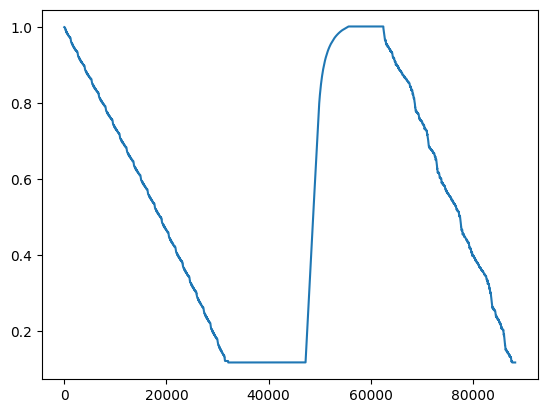

In [13]:
#load and plot the test data

df = pd.read_csv(filename)

import matplotlib.pyplot as plt
plt.plot(df['SOC'])
plt.show()